Fiona note: shows how to do the rotated views

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def draw_cubes(cubes, ticks=False, grid=False, view='', flip='', rot=0, ax3d=None):
    
    # create empty cube
    cubes_to_draw = np.zeros(cubes.shape)
    
    # set elements to 1 where colour is not empty
    cubes_to_draw[cubes!=''] = 1

    # make figure and 3d axes for plotting
    if ax3d is None:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d', proj_type='ortho', box_aspect=(4,4,4))
    else:
        ax = ax3d
        
    nx, ny, nz = cubes.shape

    ax.axes.set_xlim3d(0, nx) 
    ax.axes.set_ylim3d(0, ny) 
    ax.axes.set_zlim3d(0, nz) 

    # The cubes can be plotted using a 3D voxels plot
    ax.voxels(cubes_to_draw, facecolors=cubes, edgecolors='k', shade=False);

    # view argument allows users to set a 2D projection
    if view == 'xy': ax.view_init(90, -90, 0+rot)
    elif view == '-xy': ax.view_init(-90, 90, 0-rot)
    elif view == 'xz': ax.view_init(0, -90, 0+rot)
    elif view == '-xz': ax.view_init(0, 90, 0-rot)
    elif view == 'yz': ax.view_init(0, 0, 0+rot)
    elif view == '-yz': ax.view_init(0, 180, 0-rot)
    else:   ax.view_init(azim=ax.azim+rot)

    # flip argument allows user to show a mirror image
    # flip='x' reverses image in x direction etc.
    if 'x' in flip: ax.axes.set_xlim3d(nx, 0) 
    if 'y' in flip: ax.axes.set_ylim3d(ny, 0) 
    if 'z' in flip: ax.axes.set_zlim3d(nz, 0) 

    # style figure ticks and grid lines
    if ticks==False: 
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis.line.set_linestyle('')
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            
    if grid==False and ticks==False: ax.set_axis_off()
    
    if ax3d is not None:
        # return axes with result
        return
    else:
        # show image
        display(fig)

        # delete figure
        plt.close(fig)

    return

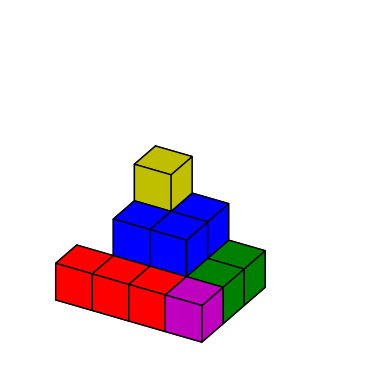

In [3]:
# define a 5 x 5 x 5 cube space

# to draw a cube in the space
# we set the entry to a colour

# allowed colours:
#
# r - red,     g - green, b - blue, 
# m - magenta, c - cyan,  y - yellow
# k - black,   w - white

# define 3d 5x5x5 string array with entries set to '' 
cubes = np.full((5,5,5),'')

# construct cube arrangement 
# by inserting color codes into 3D array

cubes[0:3,0,0] = 'r' 
cubes[3,1:3,0] = 'g' 
cubes[1:3,1:3,0:2] = 'b' 
cubes[3,0,0] = 'm'
cubes[1,2,2] = 'y'

# draw in 3D
draw_cubes(cubes)

### `rot` argument lets us rotate the view

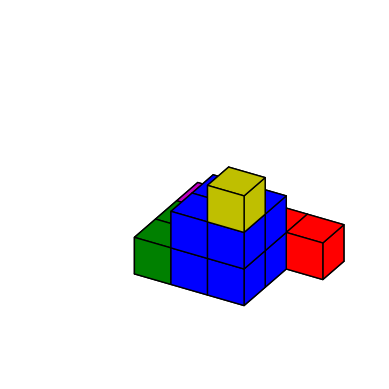

In [4]:
# draw in 3D after rotating 180
draw_cubes(cubes, rot=180)

### `view` argument let us project a 2D view

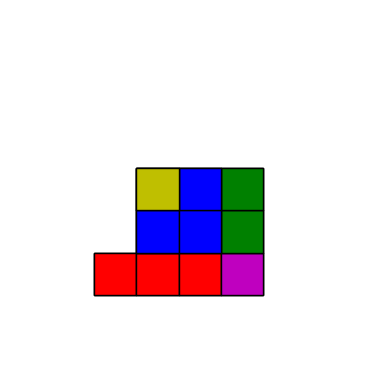

In [5]:
# draw the view from top in XY plane
draw_cubes(cubes, view='xy')

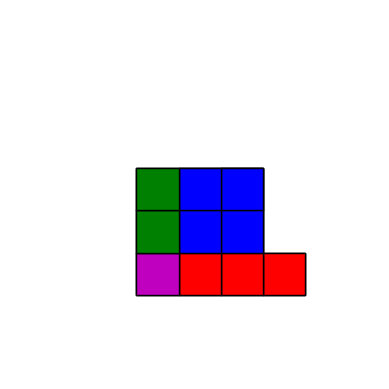

In [6]:
# draw the view from bottom in XY plane
draw_cubes(cubes, view='-xy')

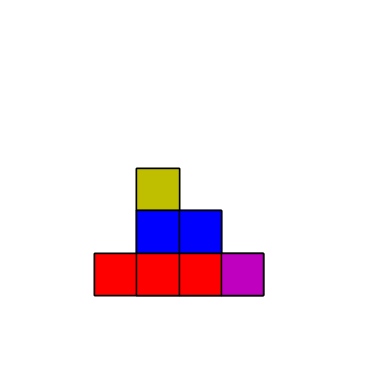

In [7]:
# draw the side view in XZ direction
draw_cubes(cubes, view='xz')

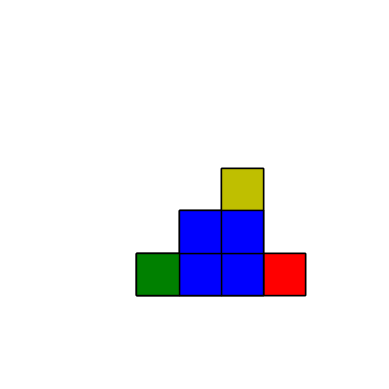

In [8]:
# draw the side view in -XZ direction (other side)
draw_cubes(cubes, view='-xz')

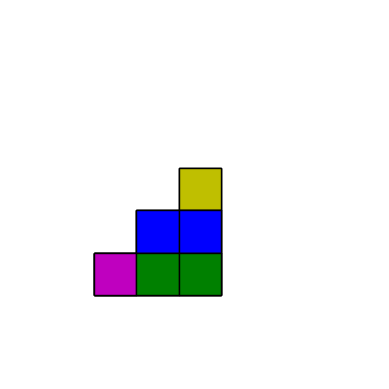

In [9]:
# draw the side view in YZ direction
draw_cubes(cubes, view='yz')

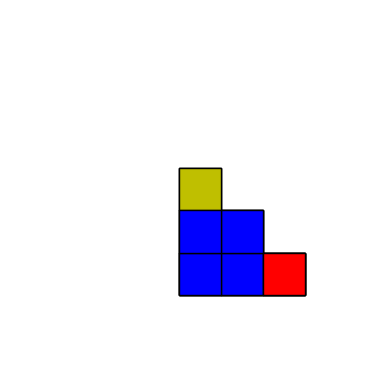

In [10]:
# draw the side view in -YZ direction (other side)
draw_cubes(cubes, view='-yz')

### `flip` argument lets us view mirror image

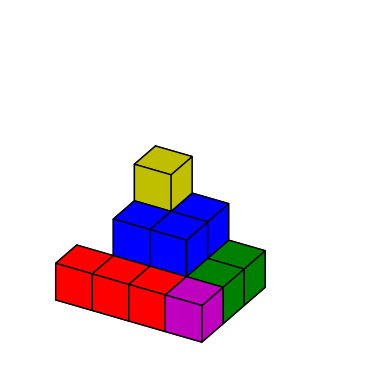

In [11]:
# can set flip to 'x' 'y' or 'z' to mirror in each direction
draw_cubes(cubes)

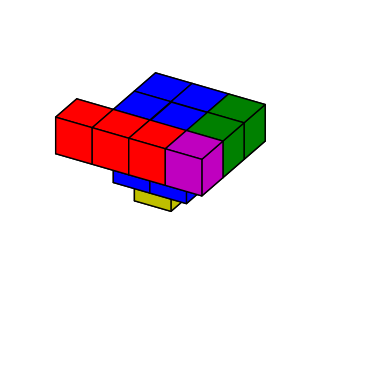

In [12]:
draw_cubes(cubes, flip='z')

### `grid` argument lets us show/hide the axes gridlines

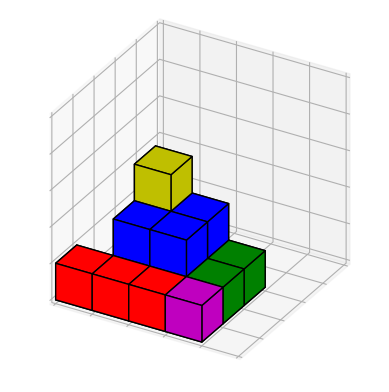

In [13]:
# draw in 3D
draw_cubes(cubes, grid=True)

### `ticks` argument lets us show/view axes tick labels

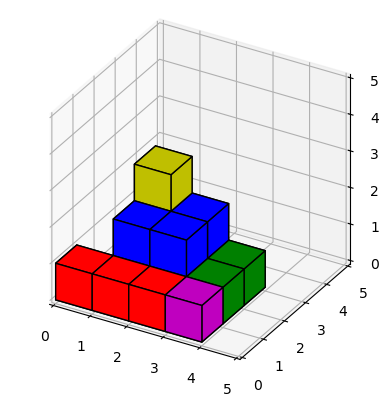

In [14]:
# draw in 3D
draw_cubes(cubes, ticks=True)